# Lab | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Instructions
1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info).

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [1]:
# 1 Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3 First look at its main features (head, shape, info).
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [7]:
# 5 Change effective to date column to datetime format.
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date'].head

<bound method NDFrame.head of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

In [8]:
customer_df['effective_to_date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

In [9]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable,
# and do the same for discrete_df

def check_cd(data, limit):
    
    discrete = pd.DataFrame()
    continuous = pd.DataFrame()
    
    for name in data.columns:
        if len(data[name].unique()) < limit:
            print(name, 'is discrete')
            discrete[name]=data[name]
        else:
            print(name, 'has', len(data[name].unique()), 'unique values')
            continuous[name]=data[name]
            
    return discrete, continuous

In [10]:
discrete_df, continouos_df = check_cd(customer_df, 10)

customer has 9134 unique values
state is discrete
customer_lifetime_value has 8041 unique values
response is discrete
coverage is discrete
education is discrete
effective_to_date has 59 unique values
employmentstatus is discrete
gender is discrete
income has 5694 unique values
location_code is discrete
marital_status is discrete
monthly_premium_auto has 202 unique values
months_since_last_claim has 36 unique values
months_since_policy_inception has 100 unique values
number_of_open_complaints is discrete
number_of_policies is discrete
policy_type is discrete
policy is discrete
renew_offer_type is discrete
sales_channel is discrete
total_claim_amount has 5106 unique values
vehicle_class is discrete
vehicle_size is discrete


In [11]:
continouos_df.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [12]:
discrete_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


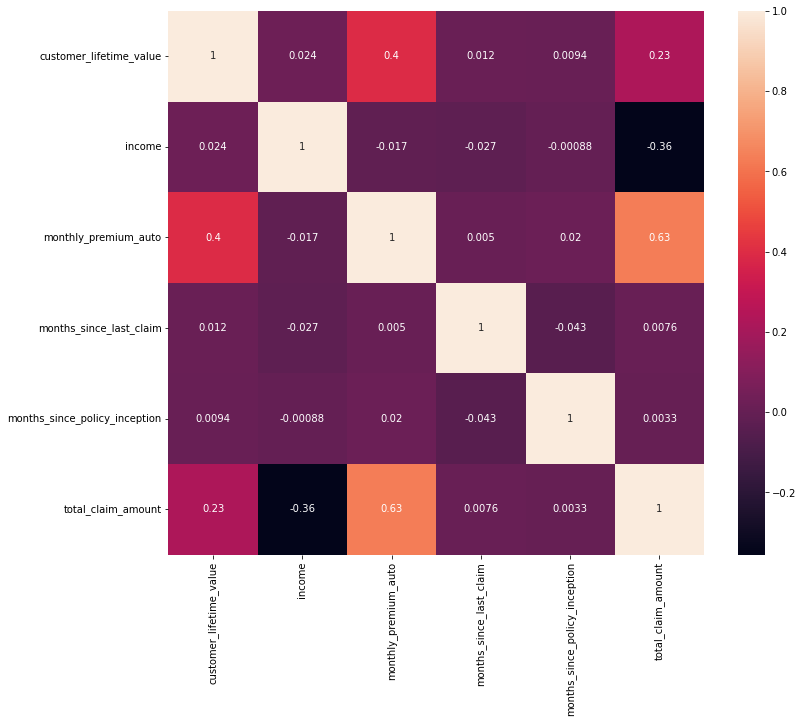

In [13]:
# 7 Plot a correlation matrix, comment what you see.
fig, ax=plt.subplots(figsize=(12,10))
correlations_matrix = continouos_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


comment what you see: monthly premium auto is most correlated but not at a level that requires any action, shouldnt affect model 

In [14]:
# 8a. Create a function to plot every discrete variable. Do the same with the continuous variables 

In [15]:
def show_hist(data):
    for i in data.columns:
        print(i, len(data[i].unique()))
        sns.histplot(data[i])
        plt.show()

state 5


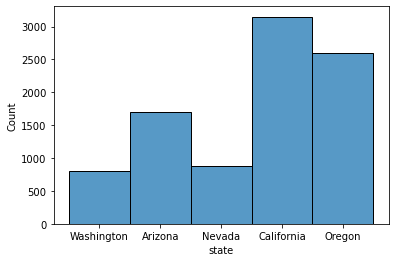

response 2


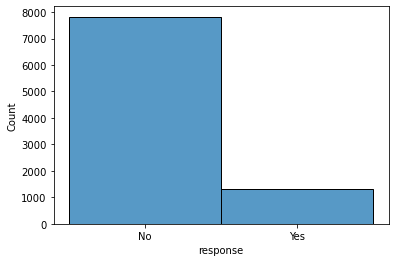

coverage 3


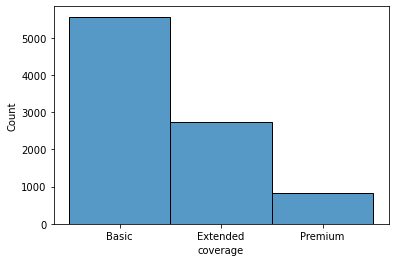

education 5


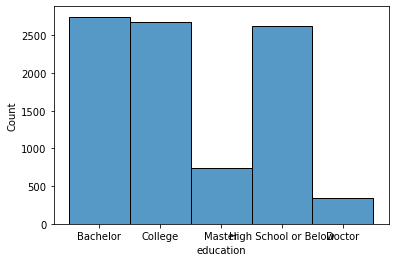

employmentstatus 5


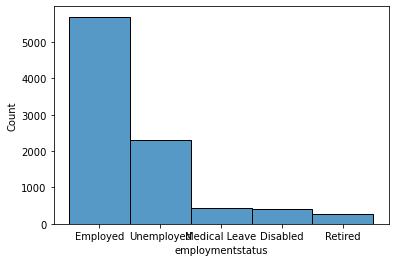

gender 2


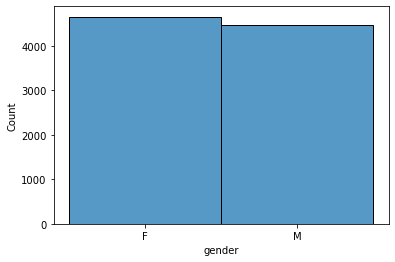

location_code 3


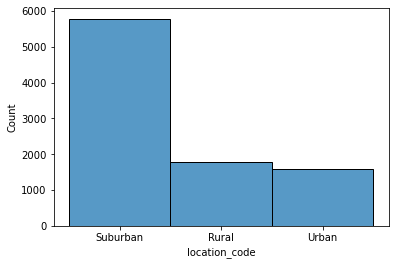

marital_status 3


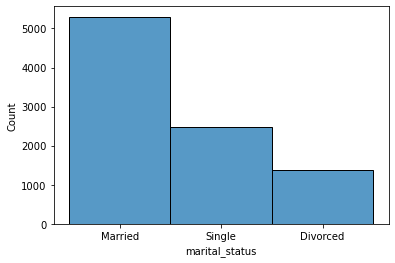

number_of_open_complaints 6


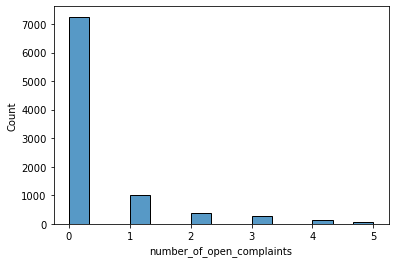

number_of_policies 9


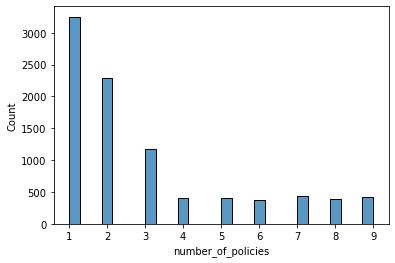

policy_type 3


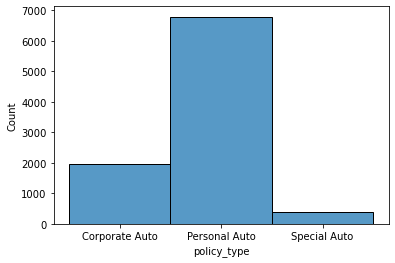

policy 9


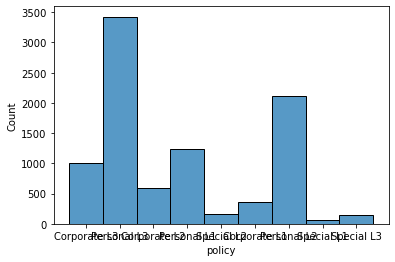

renew_offer_type 4


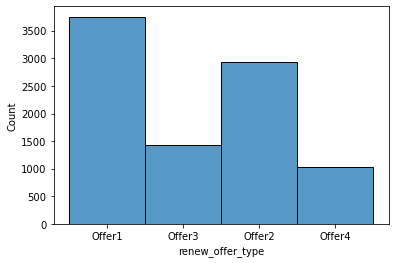

sales_channel 4


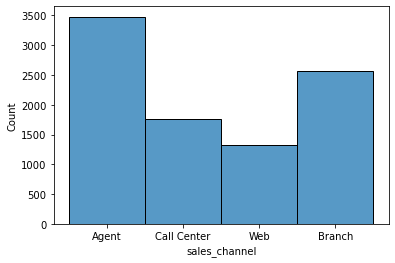

vehicle_class 6


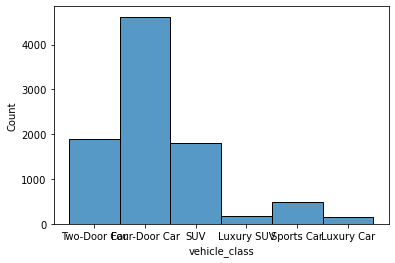

vehicle_size 3


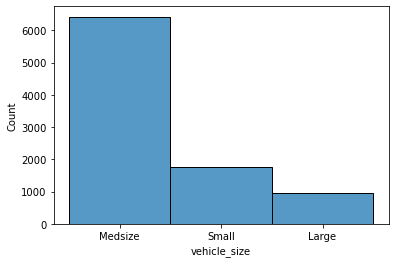

In [16]:
show_hist(discrete_df)

In [17]:
# 8b. Do the same with the continuous variables

In [18]:
def show_dis(temp):
    for i in temp.drop(['customer', 'effective_to_date'], axis=1).columns:
        sns.displot(data=temp, x=i, kde=True)
    return

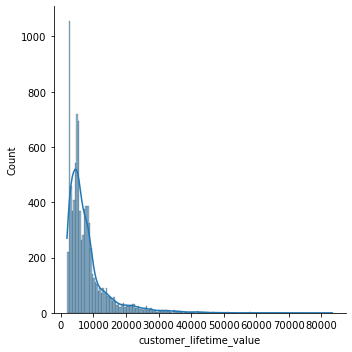

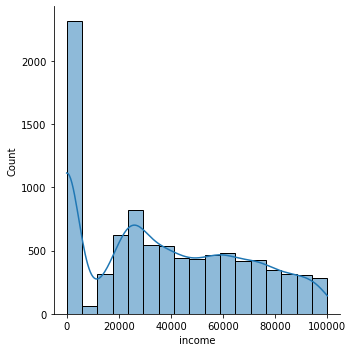

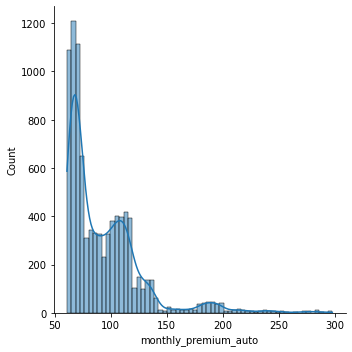

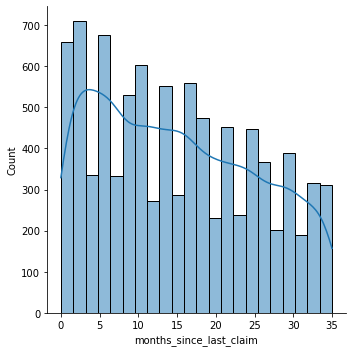

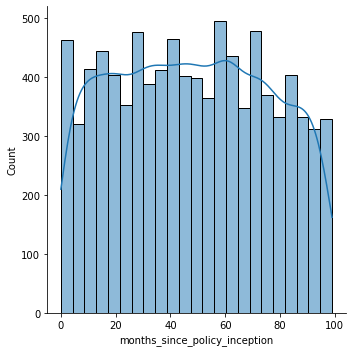

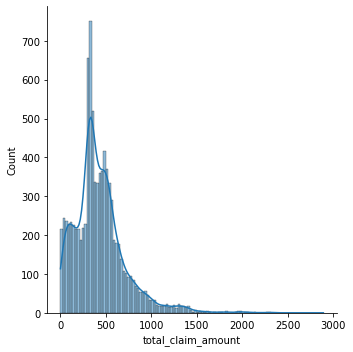

In [19]:
show_dis(continouos_df)

customer_lifetime_value


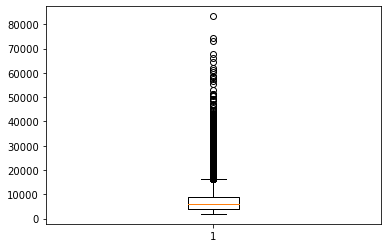

income


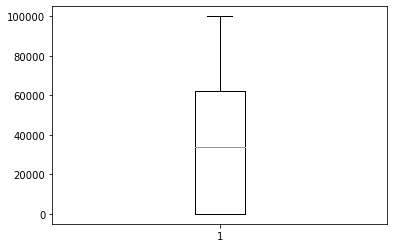

monthly_premium_auto


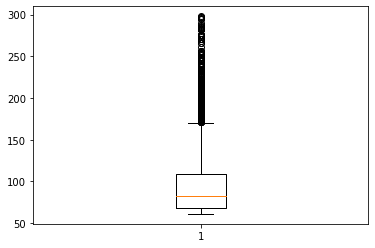

months_since_last_claim


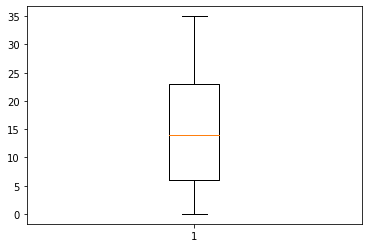

months_since_policy_inception


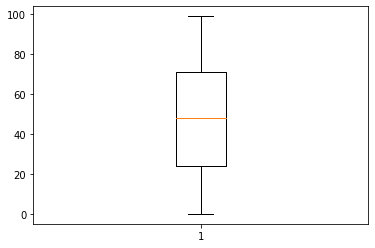

total_claim_amount


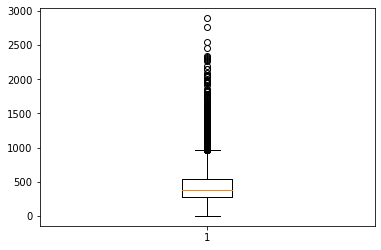

In [20]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
tmp = continouos_df.drop(['customer', 'effective_to_date'], axis=1)
for i in tmp:
    print(i)
    plt.boxplot(continouos_df[i])
    plt.show()

In [21]:
# 11. Did you find outliers? Comment what you will do with them.
# total_claim_amount is the target (ithink) so wouldnt do anythign with this column 

In [22]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [23]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

# Instructions
1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [24]:
# 1
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [25]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
# 3. Check for NaN values.
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [27]:
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [28]:
# 4. Check all unique values of columns.
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [29]:
# 5. Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [30]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it.
print('policy:', categorical_df['policy'].unique())
print('renew_offer_type:', categorical_df['renew_offer_type'].unique())
print

policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']


<function print>

In [31]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.


In [32]:
# 8. Compare policy_type and policy. What information is contained in these columns. 
# Can you identify what is important?
# can keep policy type as its an amalgamtion of the unique values in policy 

In [33]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? 
# Comment your thoughts and make those changes.
categorical_df.nunique()
# drop customer, drop policy as would use policy_type, vehicle size keep vehicle size drop vehicle class

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

# Instructions
1. Open the categoricals variable we created before.
+ categoricals = data.select_dtypes(np.object)
+ categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [34]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [36]:
categorical_df = categorical_df.drop(['customer'], axis=1)

In [37]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


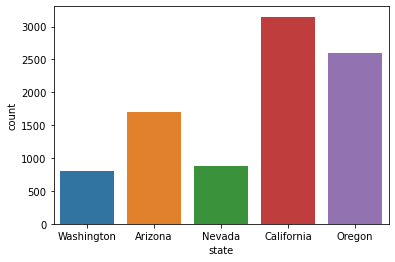

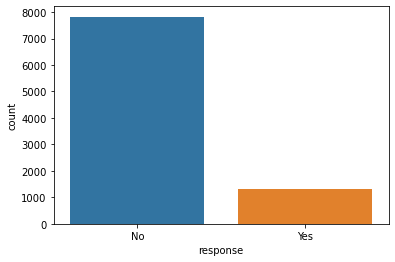

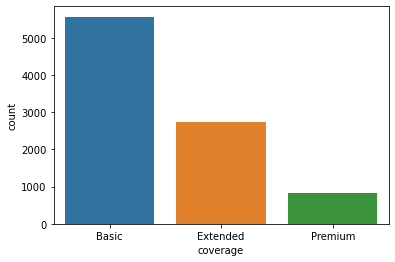

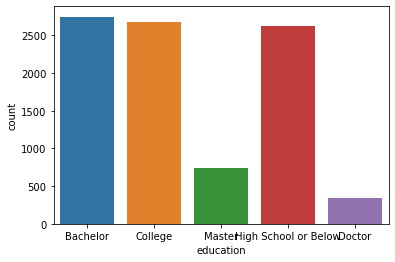

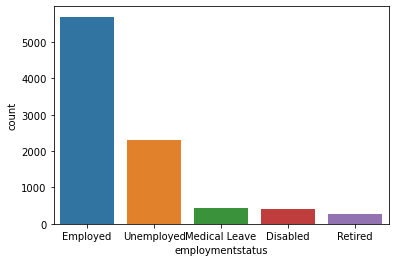

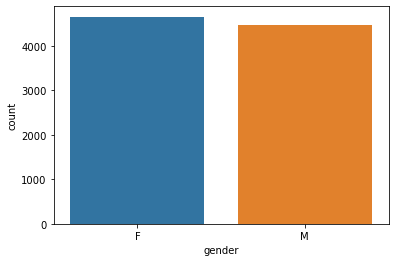

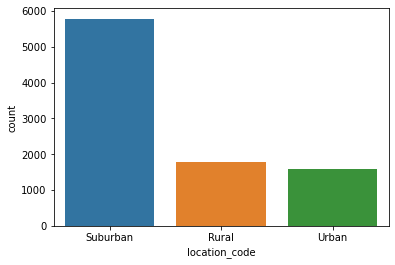

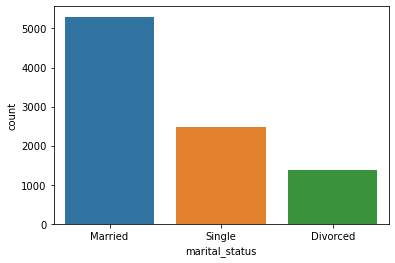

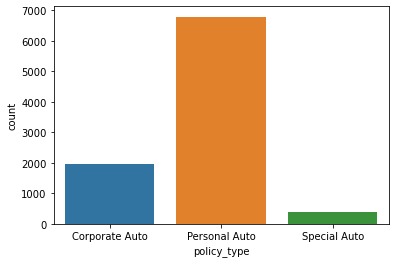

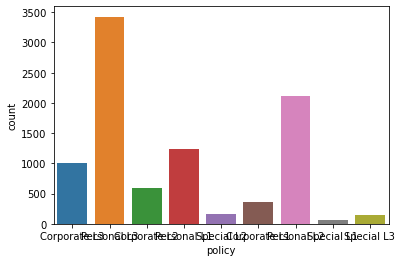

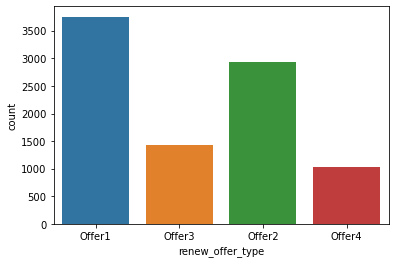

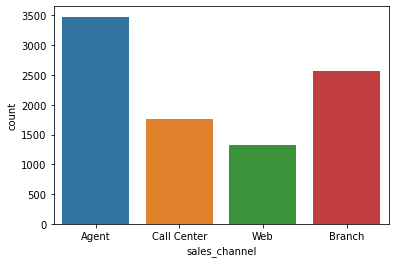

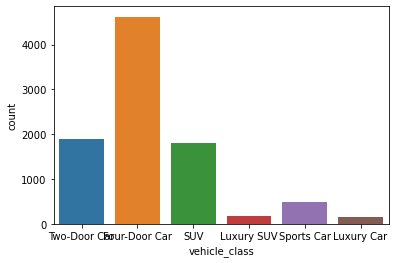

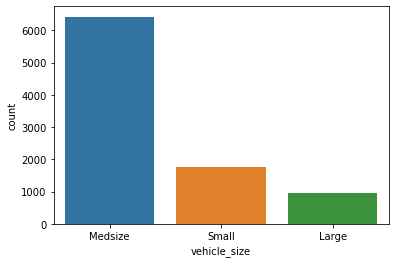

In [39]:
def plot_cat(data):
    for col in data.columns:
        sns.countplot(x=data[col])
        plt.show()
plot_cat(categorical_df)

In [40]:
# 3. 

In [41]:
# can keep policy type as its an amalgamtion of the unique values in policy, so drop policy?
# vehicle size and vehicle type are related, keep the smaller one

In [ ]:
# 4.

In [50]:
time_df = customer_df[['effective_to_date', 'customer']]

In [51]:
time_df = time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique})
# time_df=time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}).rename(columns={'customer':'number'})

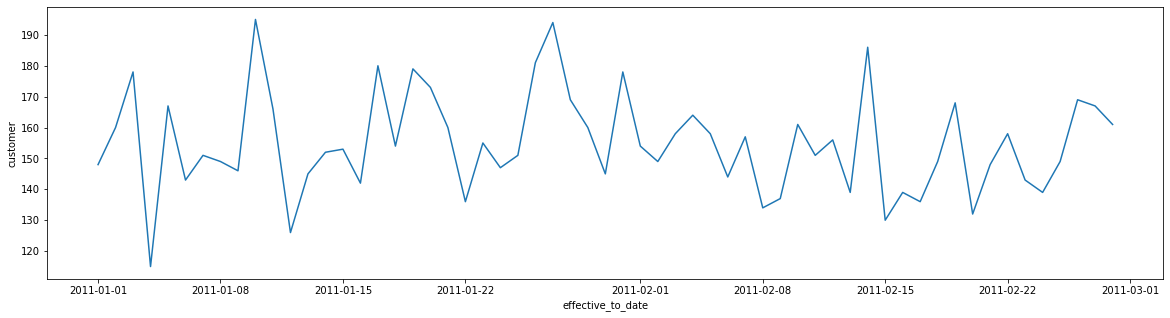

In [52]:
plt.figure(figsize=(20,5))
sns.lineplot(data=time_df, x='effective_to_date', y='customer')
plt.show()

In [ ]:
# extract: the amount of customers that had their policy start on these days?? what else does this say?
# 

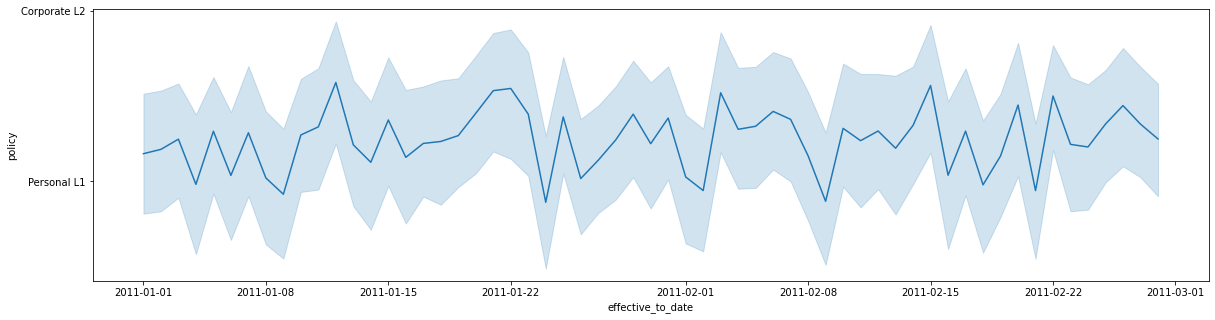

In [55]:
plt.figure(figsize=(20,5))
sns.lineplot(data=customer_df, x='effective_to_date', y='policy')
plt.show()